In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve

from xgboost import XGBClassifier

from imblearn.under_sampling import RandomUnderSampler

from warnings import simplefilter
simplefilter("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/incomes-of-30k-usa-citizens/adult.data


In [2]:
df = pd.read_csv("/kaggle/input/incomes-of-30k-usa-citizens/adult.data")

In [3]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Length: 32560, dtype: bool

In [10]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [11]:
df.shape

(32560, 15)

# Data Clean

In [12]:
col_name = ["Age","Job","Final_wnt","Education","Education_num","Marital_Status","Work","Relationship","Race","Gender","Gain","Loss","Work_hour","Country","Salaray"]
df = pd.DataFrame(df.values,columns=col_name)

# Changing the data type of columns because its wrongly asing

In [14]:
df = df.astype({"Final_wnt":"int","Education_num":"int","Work_hour":"int","Gain":"int","Loss":"int"})

In [18]:
print(f"There is no Null value in the Dataset : - \n\n {df.isnull().sum()}")

There is no Null value in the Dataset : - 

 Age               0
Job               0
Final_wnt         0
Education         0
Education_num     0
Marital_Status    0
Work              0
Relationship      0
Race              0
Gender            0
Gain              0
Loss              0
Work_hour         0
Country           0
Salaray           0
dtype: int64


In [19]:
print(f"We have total {df.duplicated().sum()} duplicate rows.")

We have total 24 duplicate rows.


In [20]:
#Replacing values in "Job" columns
df["Job"] = df["Job"].replace({
    " ?": "No Info",
    " Self-emp-not-inc":"Freelancer",
    " Self-emp-inc":'Businessman'
})

# Replacing values in "Education" columns
df["Education"] = df["Education"].replace({
    " 11th": "High-school", 
    " 12th": "High-school", 
    " 10th": "High-school", 
    " 9th": "High-school", 
    " 5th-6th": "Pri-Mid-School", 
    " 1st-4th": "Pri-Mid-School", 
    " 7th-8th": "Pri-Mid-School", 
    " Some-college": 'Dropout-college'
})

# Replacing the values in "Marital"
df["Marital_Status"] = df["Marital_Status"].replace({
    ' Married-civ-spouse': 'Married',
    ' Never-married' : 'Single',
    ' Married-AF-spouse':"Armed-Force-Spouse"
})

df["Country"] = df["Country"].replace(" ?","No Info")

# Univariant Analysis

In [21]:
print(f"The average age of person in this dataset is {df['Age'].mean().round()} \n ")
print(f"The average Working hour of person is {df['Work_hour'].mean().round()} \n ")

print(f"Highest age of person in this dataset is {df['Age'].max()} \n ")
print(f"Max Working hour of person is {df['Work_hour'].max()} \n ")

The average age of person in this dataset is 39.0 
 
The average Working hour of person is 40.0 
 
Highest age of person in this dataset is 90 
 
Max Working hour of person is 99 
 


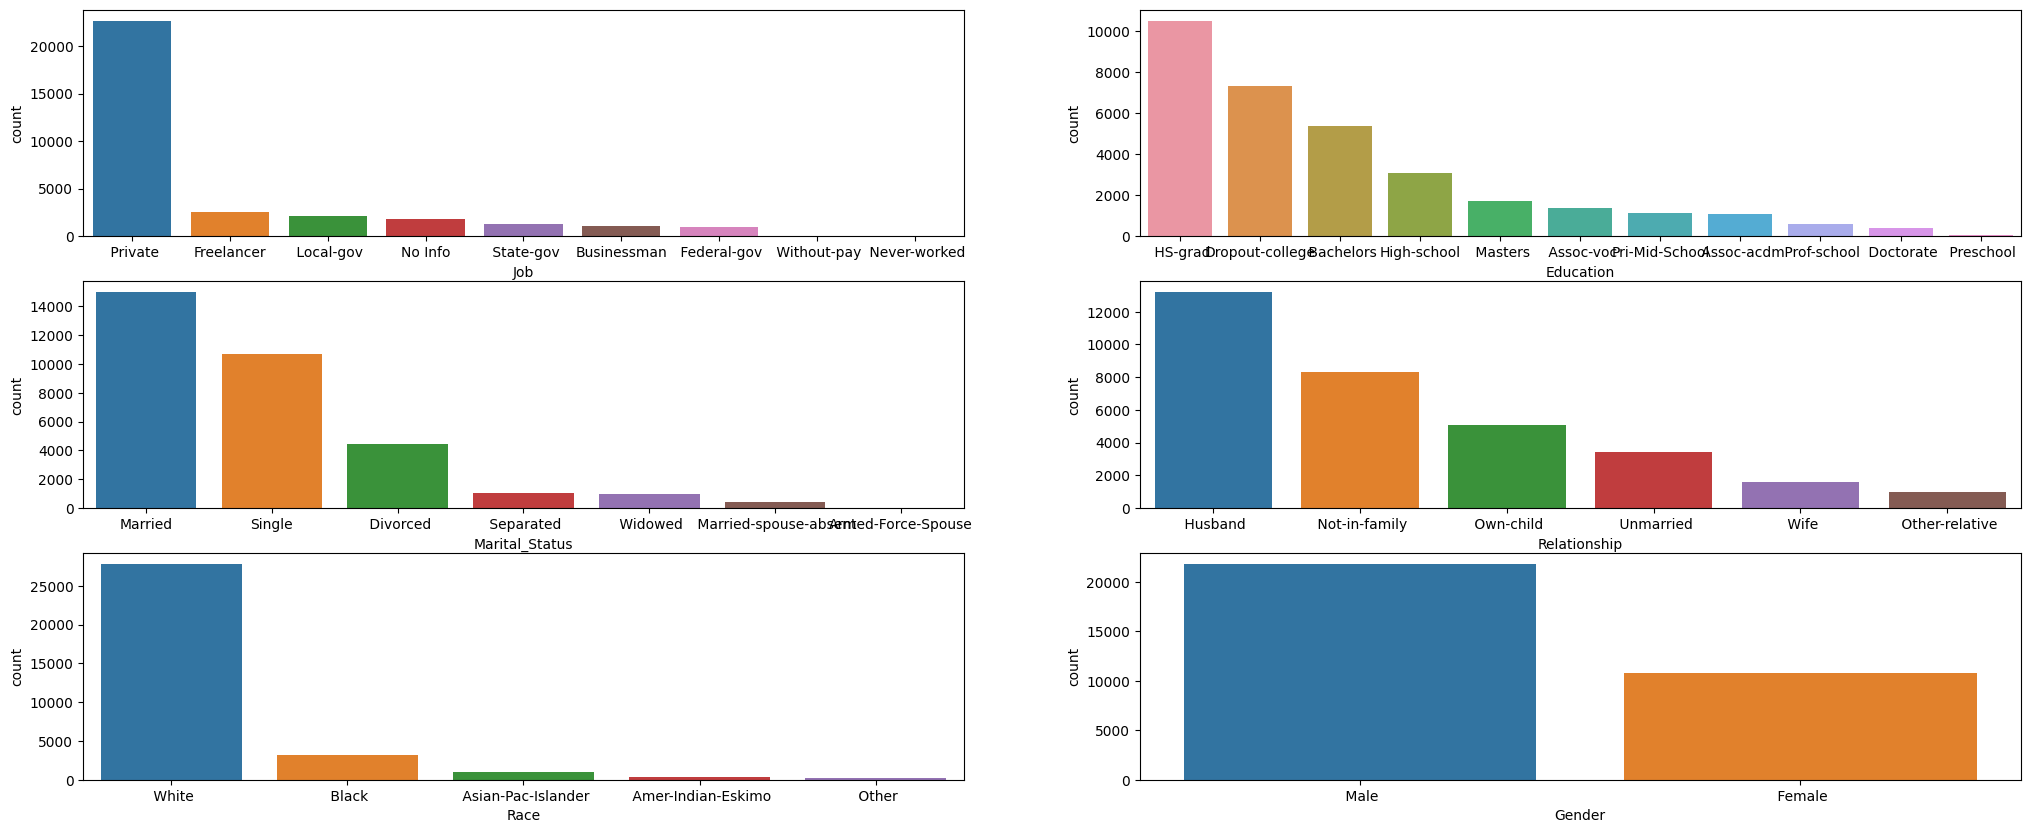

In [23]:
# Categorical Columns

Cetgorical_columns = ["Job","Education","Marital_Status","Relationship","Race","Gender"]
Cetgorical_columns_info={}

for data in Cetgorical_columns:
    Cetgorical_columns_info[data] = df[data].value_counts().reset_index()

fig,axs = plt.subplots(3,2,figsize=(25,10))
axs = axs.flatten()

for i,(df_name,value) in enumerate(Cetgorical_columns_info.items()):
    sns.barplot(data=value,x=df_name,y="count",ax=axs[i])
    plt.tight_layout

Education       Assoc-acdm   Assoc-voc   Bachelors   Doctorate   HS-grad  \
Job                                                                        
 Federal-gov            55          38         212          16       263   
 Local-gov              88          86         477          27       503   
 Never-worked            0           0           0           0         1   
 Private               729        1005        3551         181      7780   
 State-gov              41          46         269          89       268   
 Without-pay             1           0           0           0         9   
Businessman             35          38         273          35       279   
Freelancer              71         108         399          50       866   
No Info                 47          61         173          15       532   

Education       Masters   Preschool   Prof-school  Dropout-college  \
Job                                                                  
 Federal-gov         67

/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


Education   Assoc-acdm   Assoc-voc   Bachelors   Doctorate   HS-grad  \
Gender                                                                 
Female             421         500        1619          86      3390   
Male               646         882        3735         327      7111   

Education   Masters   Preschool   Prof-school  Dropout-college  High-school  \
Gender                                                                        
Female          536          16            92             2806         1015   
Male           1187          35           484             4485         2040   

Education  Pri-Mid-School  
Gender                     
Female                290  
Male                  857  
Marital_Status   Divorced   Married-spouse-absent   Separated   Widowed  \
Gender                                                                    
Female               2672                     205         631       825   
Male                 1771                     213        

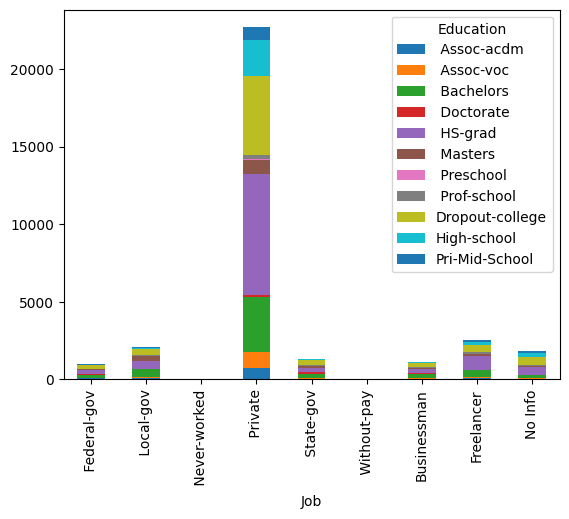

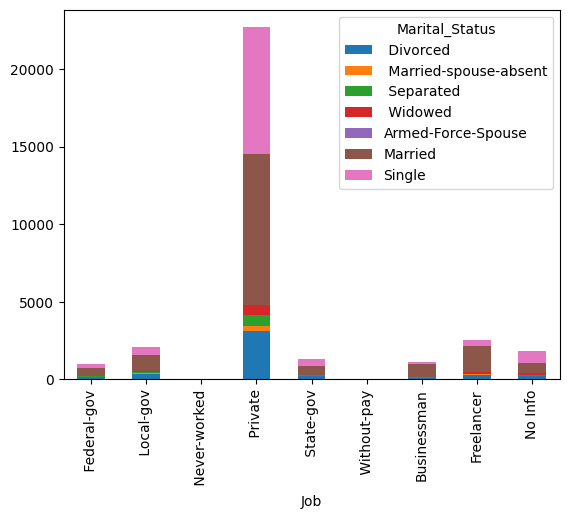

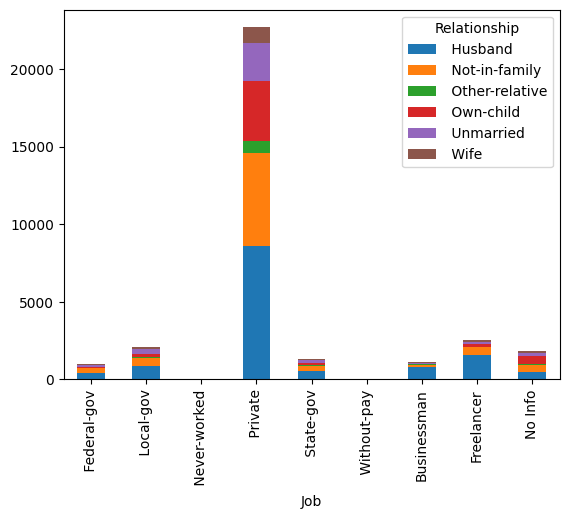

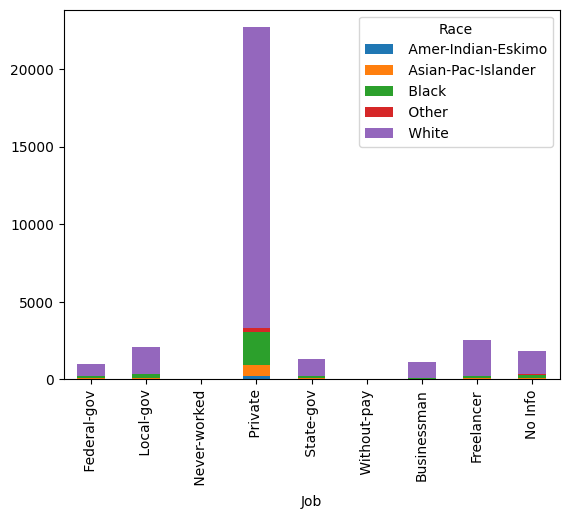

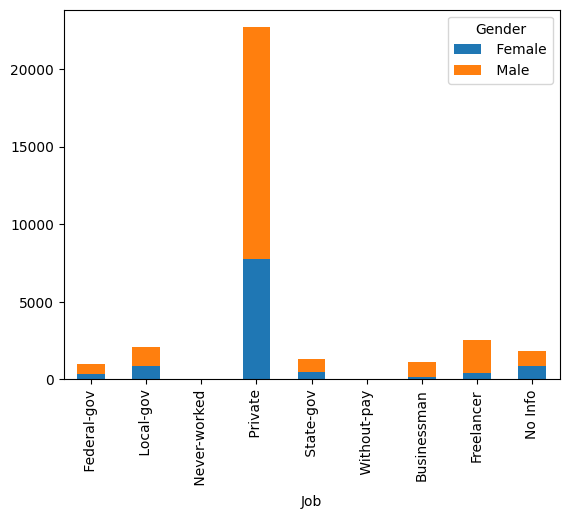

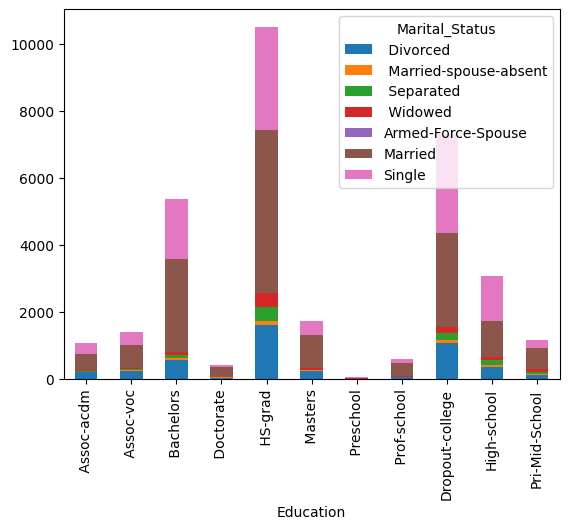

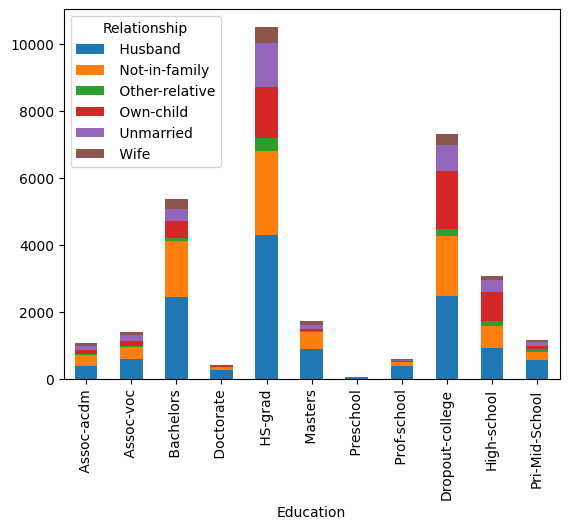

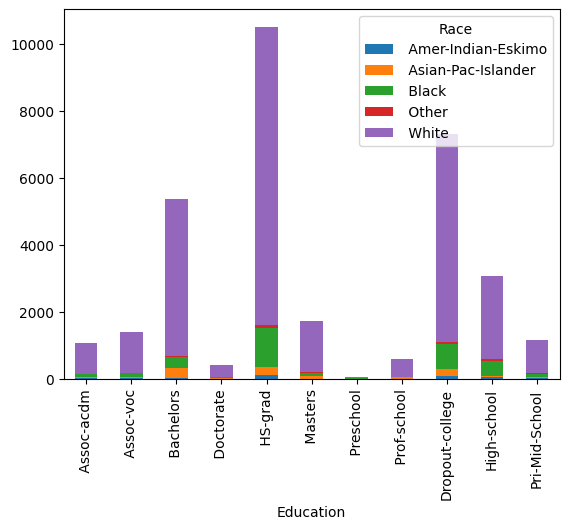

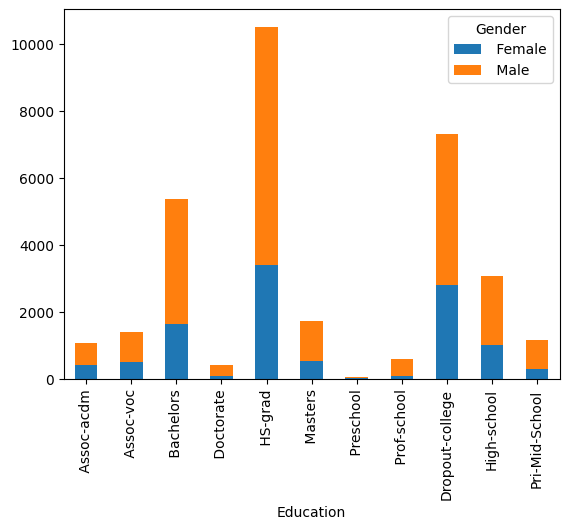

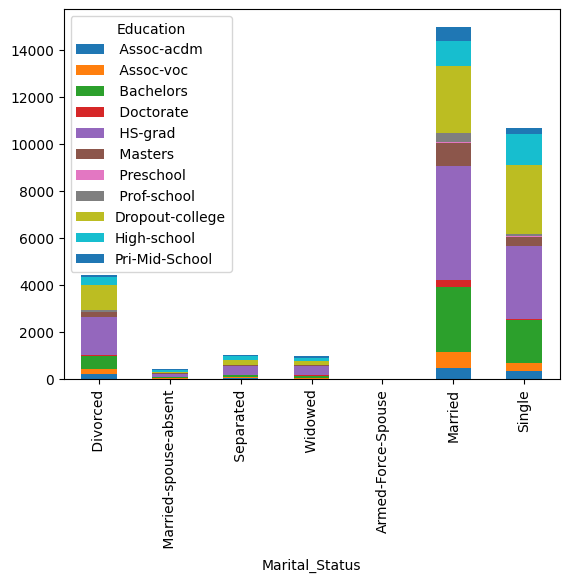

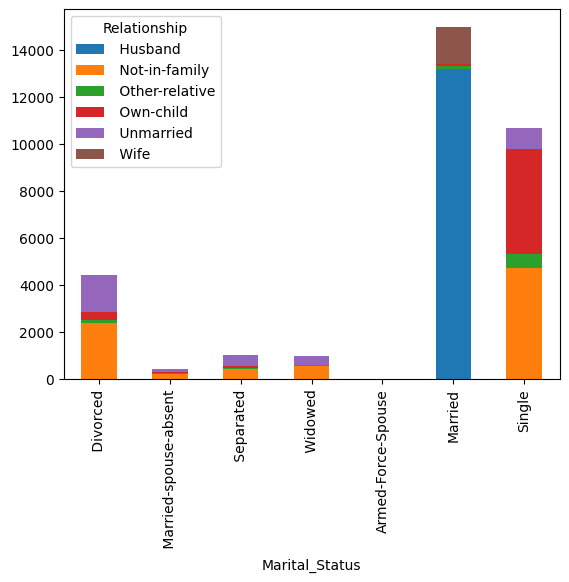

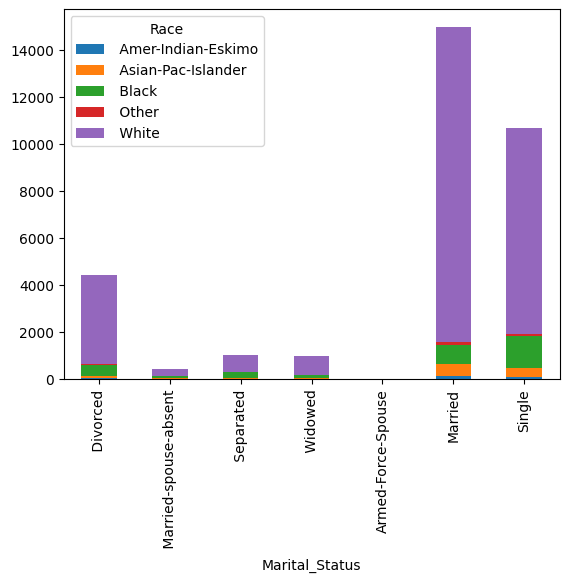

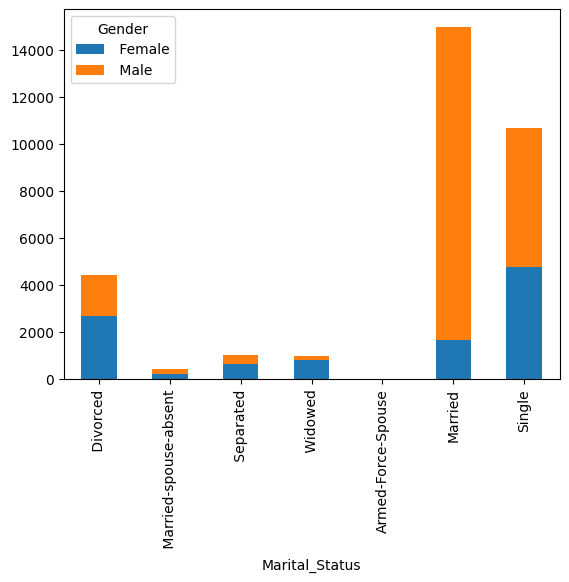

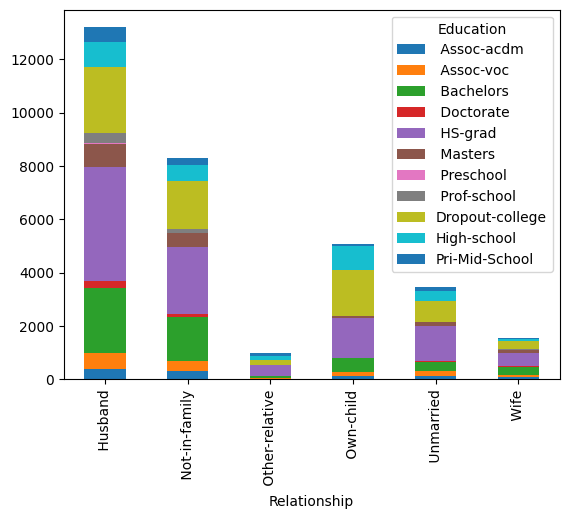

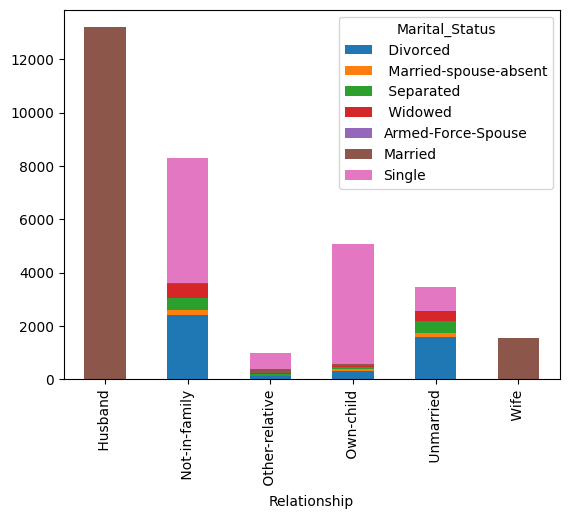

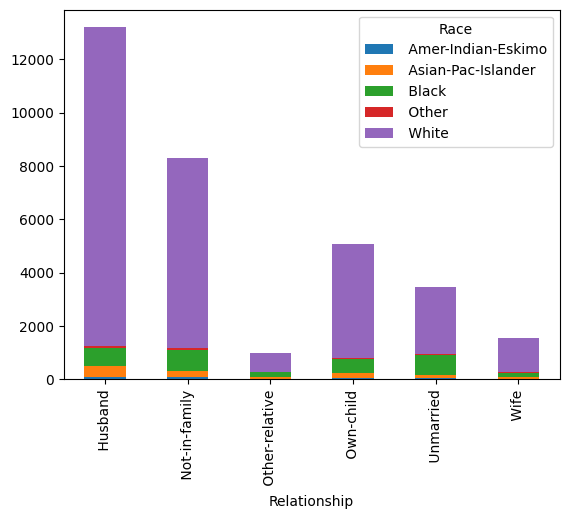

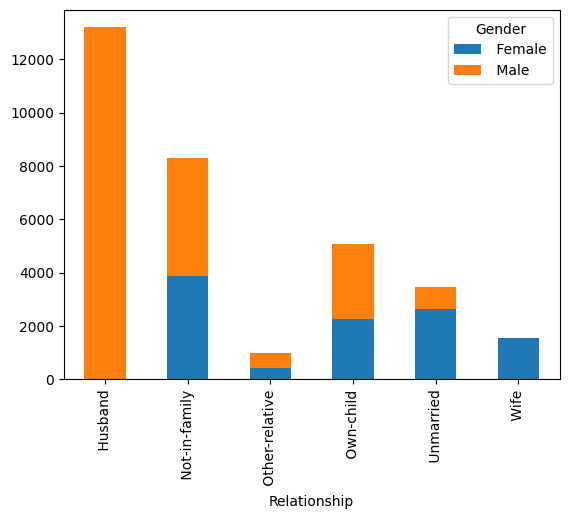

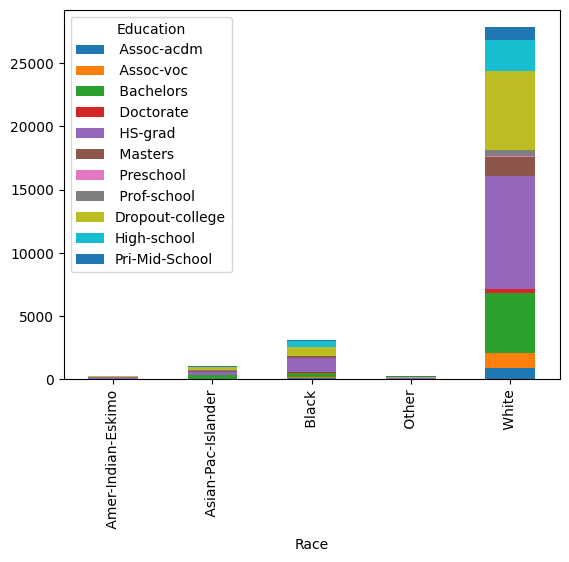

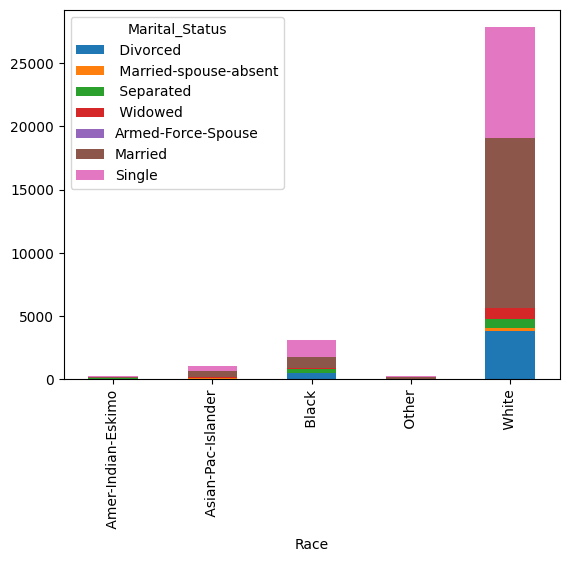

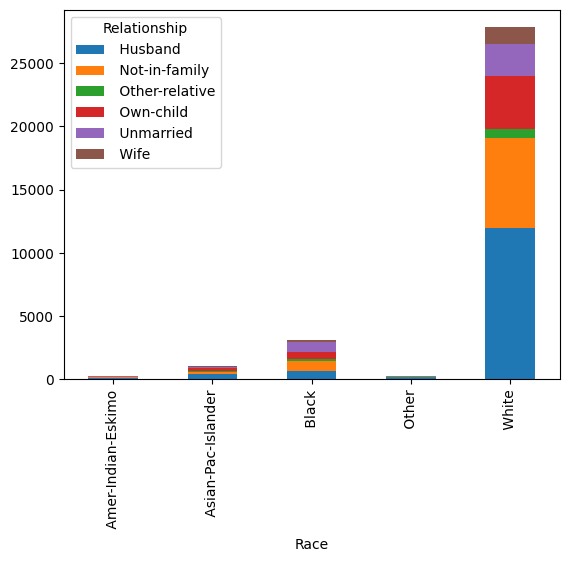

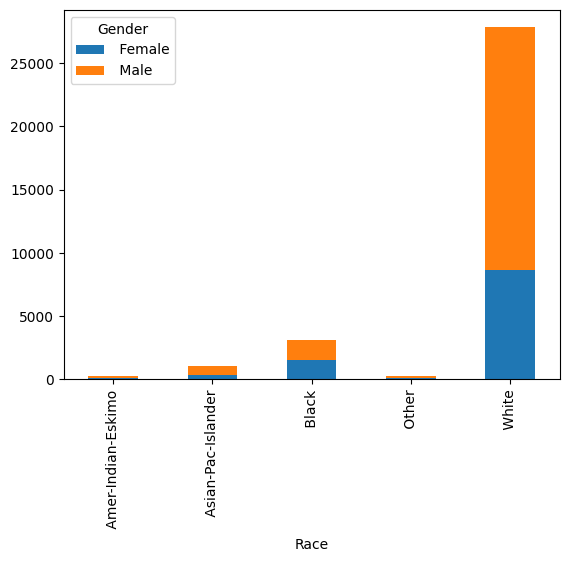

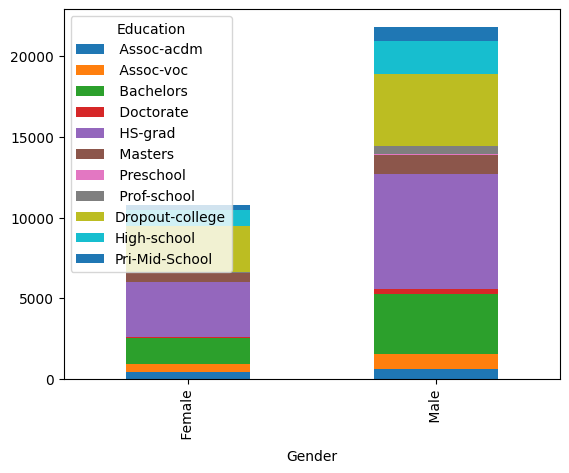

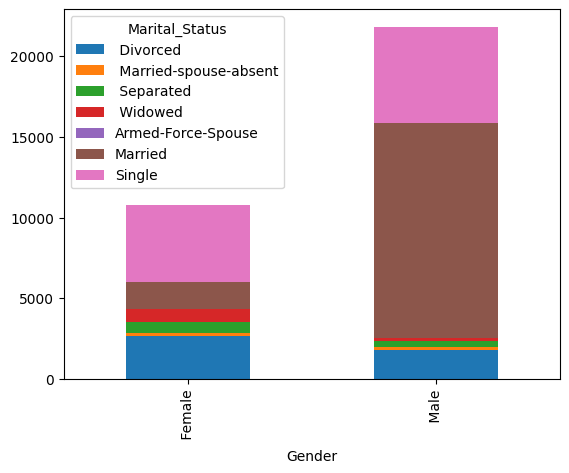

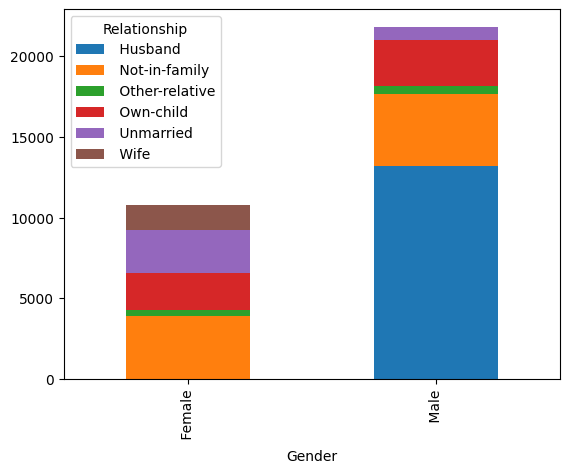

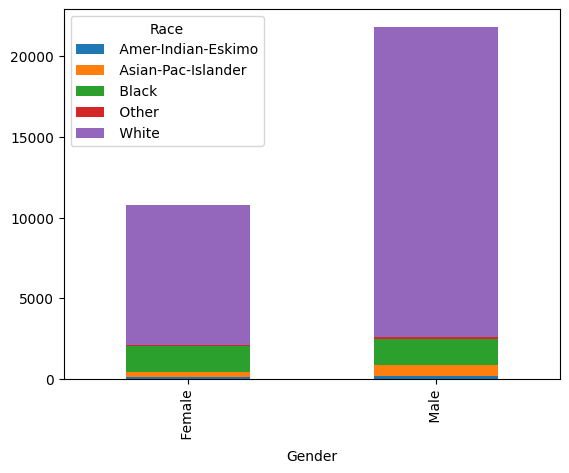

In [24]:
# Categorical-Categorical Analysis

Categorical_Analysis_columns = ["Job","Education","Marital_Status","Relationship","Race","Gender"]

for i in range(len(Categorical_Analysis_columns)):
    for f in range(len(Categorical_Analysis_columns)-1):
        if i != f+1:
            Categorical_Analysis_columns_visualization = pd.crosstab(df[Categorical_Analysis_columns[i]],df[Categorical_Analysis_columns[f+1]])
            
            # In This I performed the crosstab among all the Categorical-Categorical columns 
            print(Categorical_Analysis_columns_visualization)
            
            # In this I create the stacked bar among them 
            Categorical_Analysis_columns_visualization.plot(kind="bar",stacked=True)
    

# Bivariant analysis

In [26]:
df.head()

,Age,Job,Final_wnt,Education,Education_num,Marital_Status,Work,Relationship,Race,Gender,Gain,Loss,Work_hour,Country,Salaray
0,50,Freelancer,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,High-school,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


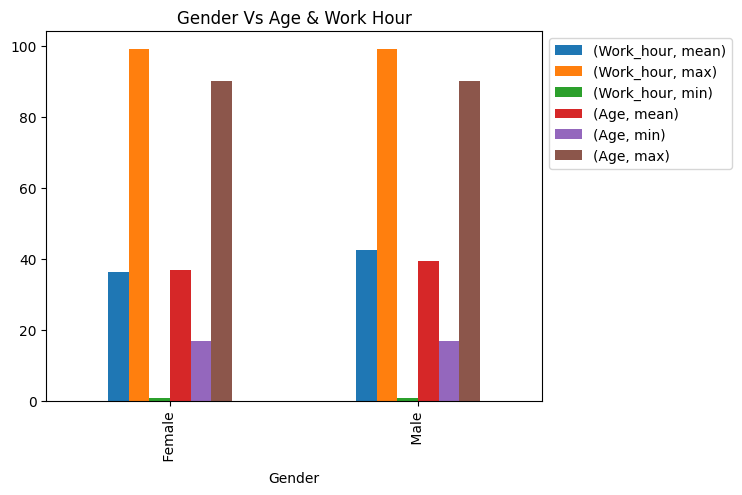

In [27]:
df = df.rename(columns = { "Salaray":"Salary"})

# Categorical-Numerical Analysis 

# Marital Status Vs Age & Work Hour

df.groupby("Gender").agg({"Work_hour":["mean","max","min"],"Age":["mean","min",'max']}).plot(kind="bar")
plt.title("Gender Vs Age & Work Hour")
plt.legend(loc="upper left",bbox_to_anchor=(1,1))

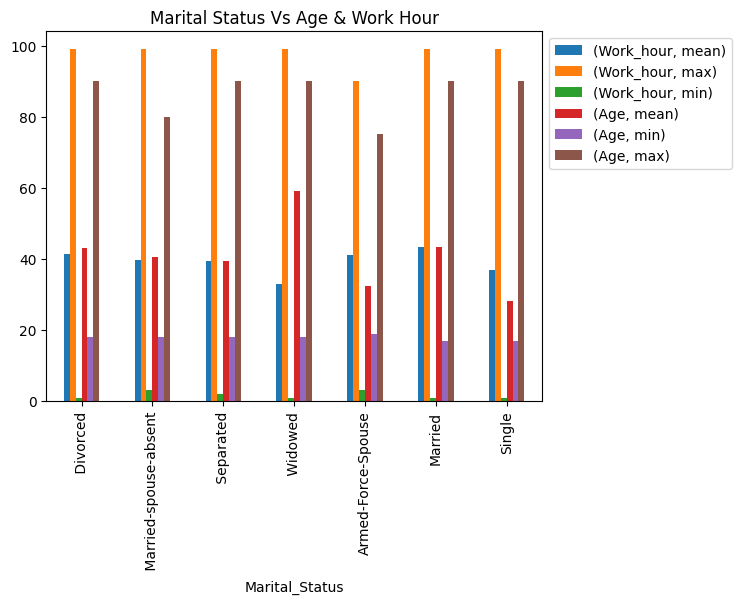

In [28]:
# Marital Status Vs Age & Work Hour 

df.groupby("Marital_Status").agg({"Work_hour":["mean","max","min"],"Age":["mean","min",'max']}).plot(kind="bar")
plt.title("Marital Status Vs Age & Work Hour")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

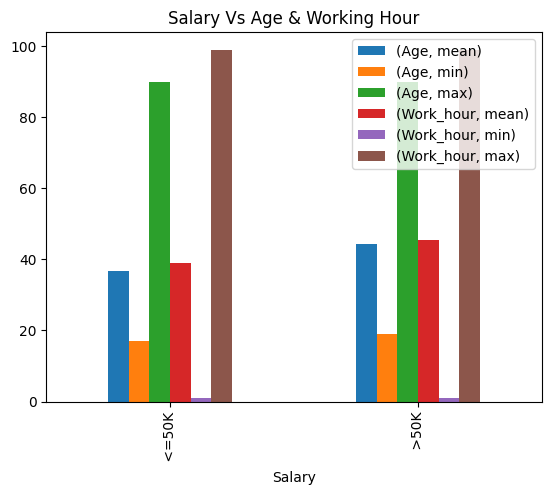

In [29]:
# Salary Vs Age & Working Hour 

df.groupby("Salary").agg({ "Age":["mean",'min','max'],"Work_hour":["mean","min",'max']}).plot(kind="bar")
plt.title("Salary Vs Age & Working Hour")
plt.legend(loc = "upper right", bbox_to_anchor=(1,1))

In [33]:
df.head()

,Age,Job,Final_wnt,Education,Education_num,Marital_Status,Work,Relationship,Race,Gender,Gain,Loss,Work_hour,Country,Salary
0,50,Freelancer,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,High-school,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [34]:
column_names = ['Age','Workclass','Fnlwgt','Education','Education-num',
                'Marital-status','Occupation','Relationship','Race',
                'Sex','Capital-gain','Capital-loss','Hours-per-week',
                'Native-country','Income']

df = pd.DataFrame(df.values,columns=column_names)
df.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,50,Freelancer,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,High-school,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [35]:
df['Income'] = df['Income'].str.strip()

In [36]:
df.drop('Fnlwgt',axis=1,inplace=True)

df.head()

,Age,Workclass,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,50,Freelancer,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,High-school,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


<Figure size 1200x600 with 0 Axes>

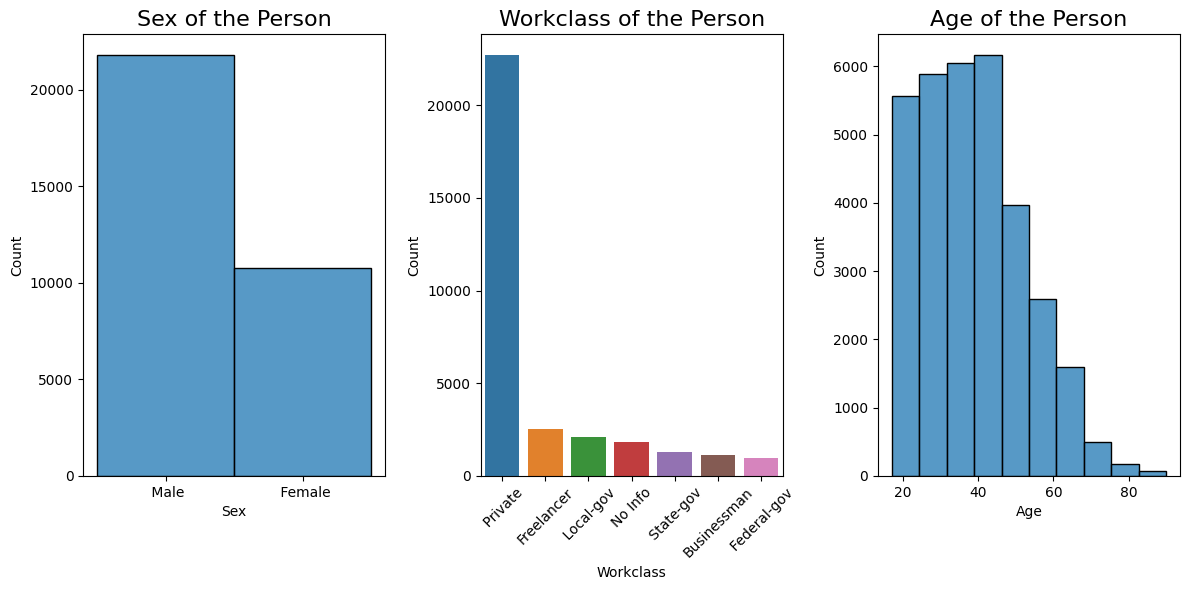

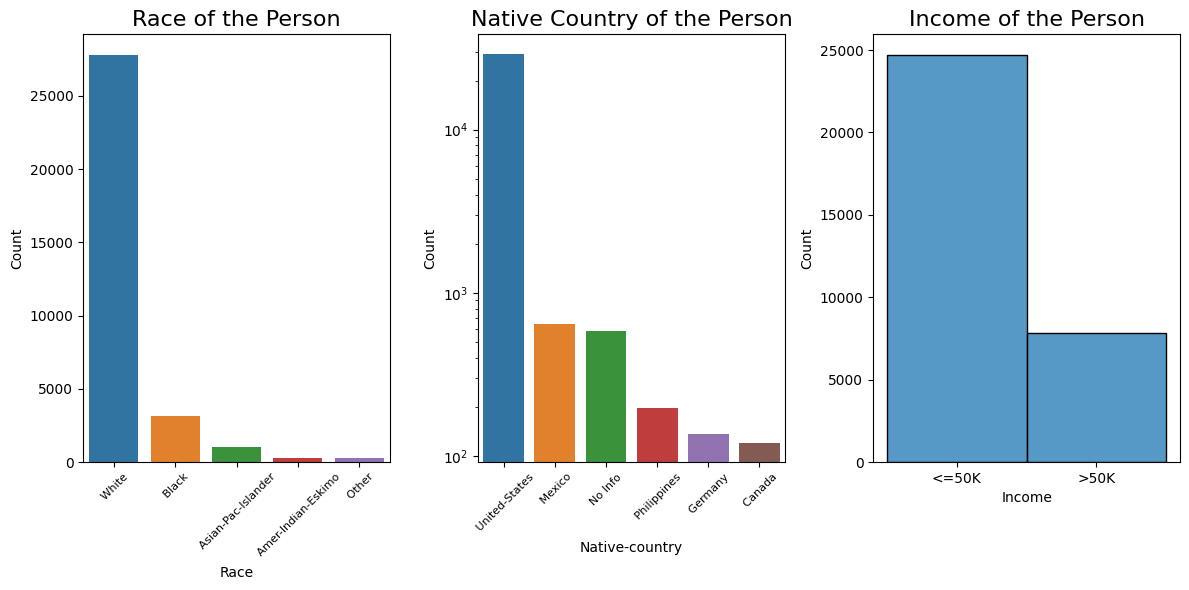

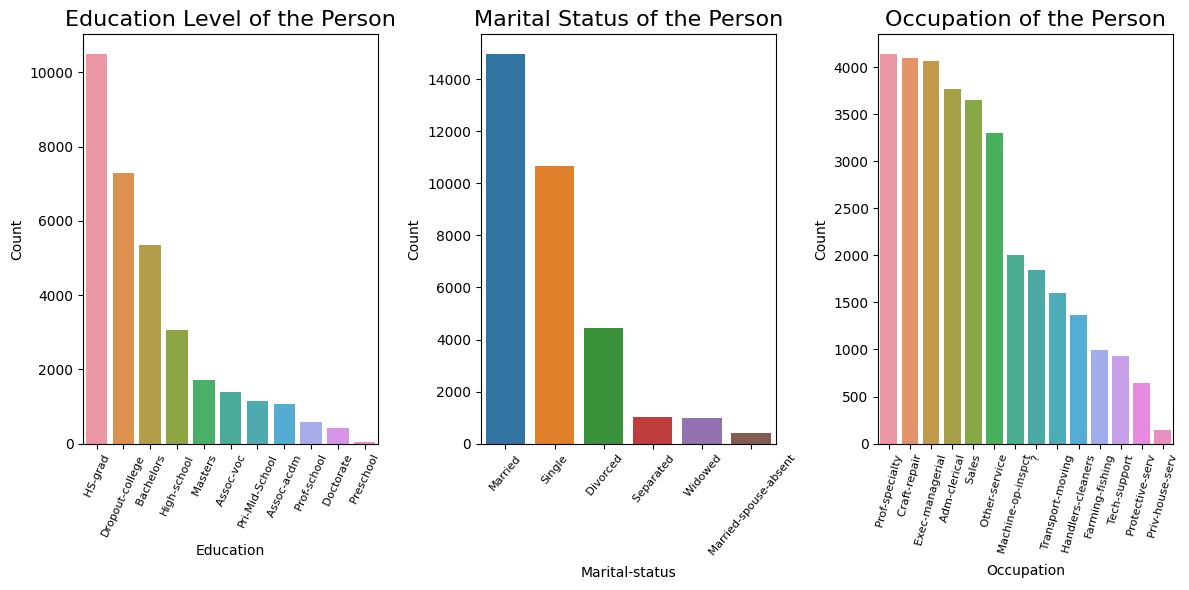

In [39]:
bigfig = plt.figure(figsize=(12,6))

(top,central,bottom) = bigfig.subfigures(3,1)

### Top figures ###
top.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4)

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,6))

ax1 = sns.histplot(data=df,x='Sex',ax=ax1)
ax1.set_title('Sex of the Person',size=16)

result = df.loc[df.Workclass != ' ?'].groupby('Workclass')['Workclass'].count().reset_index(name='Count').sort_values('Count',ascending=False)
ax2 = sns.barplot(data=result.loc[result.Count > 50],x='Workclass',y='Count',ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45,fontsize=10)
ax2.set_title('Workclass of the Person',size=16)

ax3 = sns.histplot(data=df,x='Age',bins=10,ax=ax3)
ax3.set_title('Age of the Person',size=16)

plt.tight_layout()

### Central figures ###
central.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4)

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,6))

result = df.groupby('Race')['Race'].count().reset_index(name='Count').sort_values('Count',ascending=False)
ax1 = sns.barplot(data=result,x='Race',y='Count',ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45,fontsize=8)
ax1.set_title('Race of the Person',size=16)

result = df.loc[df['Native-country'] != ' ?'].groupby('Native-country')['Native-country'].count().reset_index(name='Count').sort_values('Count',ascending=False).head(6)
ax2 = sns.barplot(data=result,x='Native-country',y='Count',ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45,fontsize=8)
ax2.set_yscale("log")
ax2.set_title('Native Country of the Person',size=16)

ax3 = sns.histplot(data=df,x='Income',ax=ax3)
ax3.set_title('Income of the Person',size=16)

plt.tight_layout()

### Bottom figures ###
bottom.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4)

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,6))

result = df.groupby('Education')['Education'].count().reset_index(name='Count').sort_values('Count',ascending=False)
ax1 = sns.barplot(data=result,x='Education',y='Count',ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=65,fontsize=8)
ax1.set_title('Education Level of the Person',size=16)

result = df.groupby('Marital-status')['Marital-status'].count().reset_index(name='Count').sort_values('Count',ascending=False)
ax2 = sns.barplot(data=result.loc[result.Count > 50],x='Marital-status',y='Count',ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=50,fontsize=8)
ax2.set_title('Marital Status of the Person',size=16)

result = df.groupby('Occupation')['Occupation'].count().reset_index(name='Count').sort_values('Count',ascending=False)
ax3 = sns.barplot(data=result.loc[result.Count > 50],x='Occupation',y='Count',ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=75,fontsize=8)
ax3.set_title('Occupation of the Person',size=16)

plt.tight_layout()

plt.show()

In [40]:
df2 = df.copy()

columns = df2.columns

for col in columns:
    df2 = df2[df2[col] != ' ?']

print(f"The number of rows after dropping ' ?' went from {len(df)} to {len(df2)}.")

The number of rows after dropping ' ?' went from 32560 to 30717.


# Data Preprocessing and Feature Importance

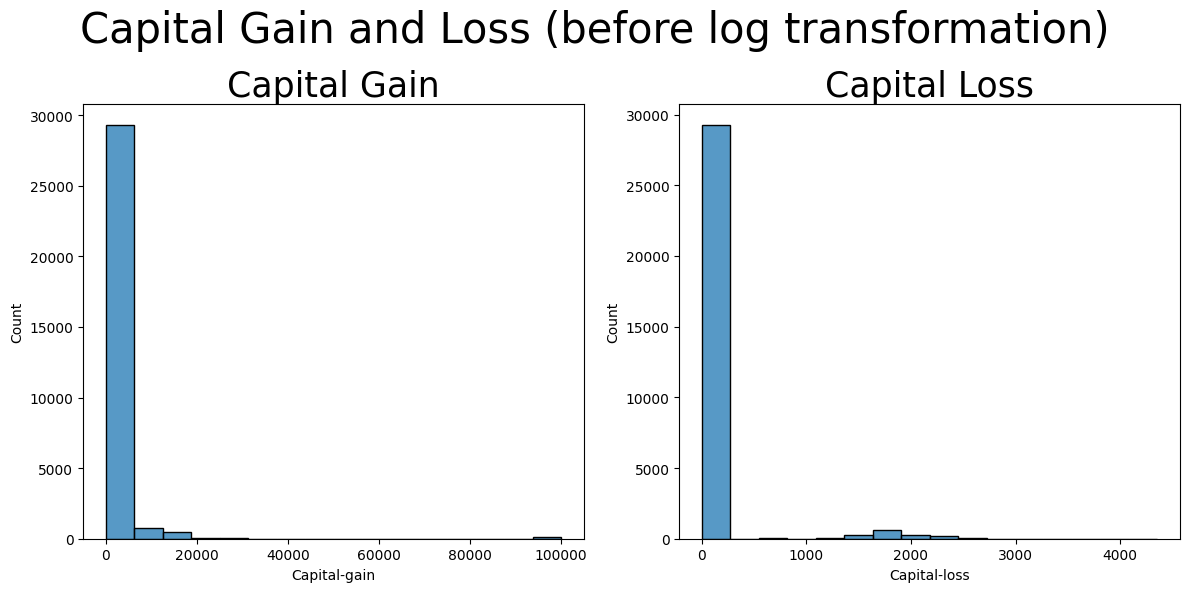

In [41]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1 = sns.histplot(data=df2,x='Capital-gain',ax=ax1)
ax1.set_title('Capital Gain',size=25)

ax2 = sns.histplot(data=df2,x='Capital-loss',ax=ax2)
ax2.set_title('Capital Loss',size=25)

plt.suptitle('Capital Gain and Loss (before log transformation)',size=30)

plt.tight_layout()

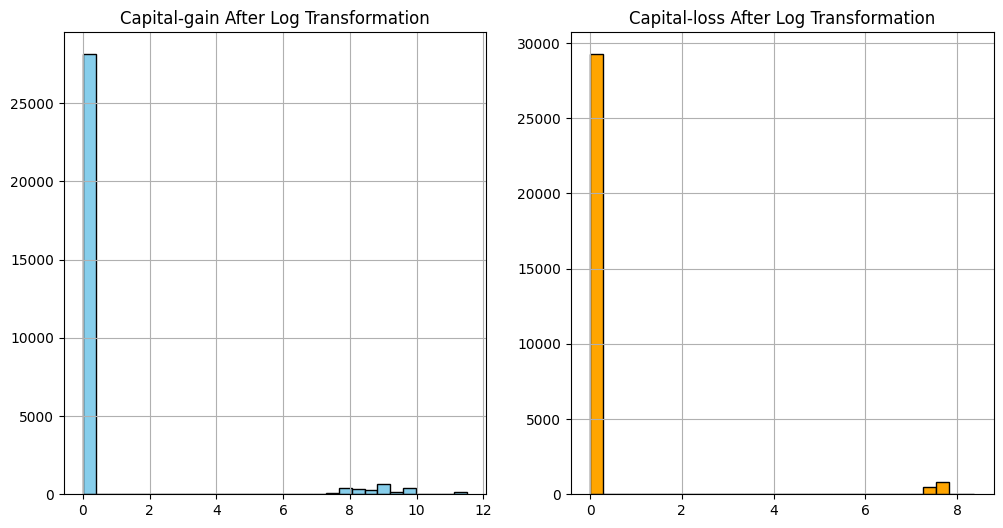

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Replace zeros with a small value (e.g., 1)
df2[skewed] = df2[skewed].replace(0, 1)

# Apply log transformation
df2[skewed] = df2[skewed].applymap(lambda x: np.log(x))

# Visualization
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
df2['Capital-gain'].hist(ax=ax1, bins=30, color='skyblue', edgecolor='black')
ax1.set_title('Capital-gain After Log Transformation')
df2['Capital-loss'].hist(ax=ax2, bins=30, color='orange', edgecolor='black')
ax2.set_title('Capital-loss After Log Transformation')
plt.show()


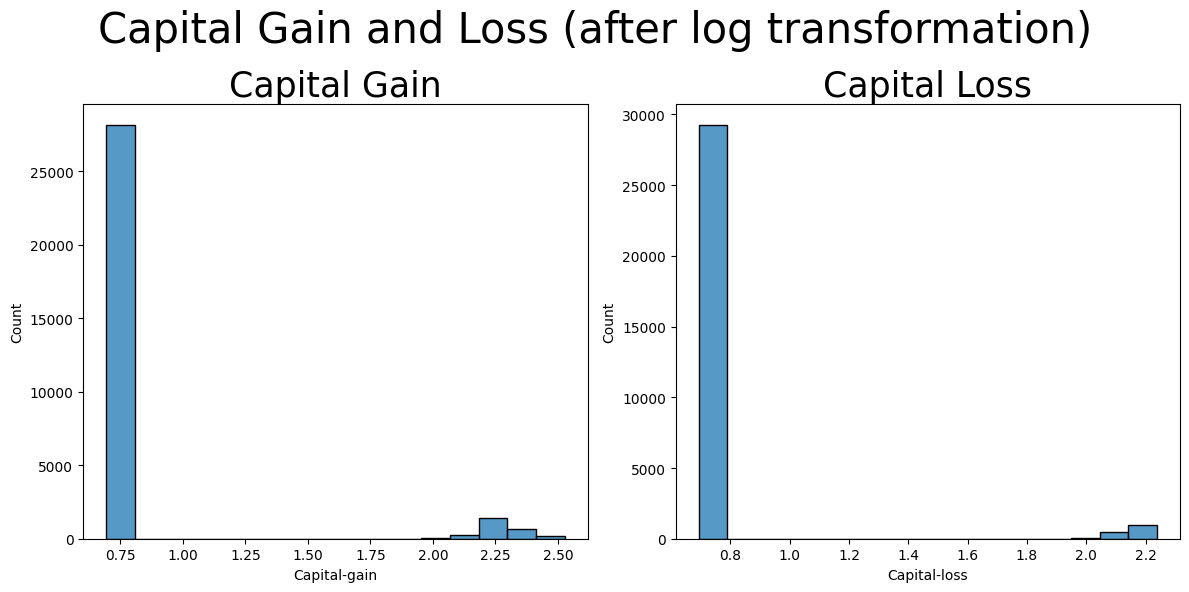

In [44]:
#############################
df2[skewed] = df2[skewed].replace(0, 1)

df2[skewed] = df2[skewed].apply(lambda x: np.log(x+1))
#############################

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1 = sns.histplot(data=df2,x='Capital-gain',ax=ax1)
ax1.set_title('Capital Gain',size=25)

ax2 = sns.histplot(data=df2,x='Capital-loss',ax=ax2)
ax2.set_title('Capital Loss',size=25)

plt.suptitle('Capital Gain and Loss (after log transformation)',size=30)

plt.tight_layout()

# Scaling the numerical Features

In [49]:
numerical_features = ['Education-num', 'Hours-per-week']

# Example: Min-Max Scaling
scaler = MinMaxScaler()
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])


In [50]:
df2.head()

,Age,Workclass,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,50,Freelancer,Bachelors,0.800000,Married,Exec-managerial,Husband,White,Male,0.0,0.0,0.122449,United-States,<=50K
1,38,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,0.397959,United-States,<=50K
2,53,Private,High-school,0.400000,Married,Handlers-cleaners,Husband,Black,Male,0.0,0.0,0.397959,United-States,<=50K
3,28,Private,Bachelors,0.800000,Married,Prof-specialty,Wife,Black,Female,0.0,0.0,0.397959,Cuba,<=50K
4,37,Private,Masters,0.866667,Married,Exec-managerial,Wife,White,Female,0.0,0.0,0.397959,United-States,<=50K


In [53]:
encoder = LabelEncoder()

X = df2.drop('Income',axis=1)

y = df2['Income']
y = encoder.fit_transform(y)

In [54]:
# List of categorical columns
categorical_features = [feature for feature in X.columns if X[feature].dtypes == 'O']

# One hot encode the categorical columns
X = pd.get_dummies(X[categorical_features])

X.head()

,Age_17,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Native-country_No Info
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [56]:
# Random Forest Model
random_forest = RandomForestClassifier(random_state=1,max_depth=4)
random_forest.fit(X_train,y_train)

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.head(15)

,feature,importance
95,Marital-status_Married,0.154
96,Marital-status_Single,0.119
111,Relationship_ Husband,0.109
100,Occupation_ Exec-managerial,0.070
122,Sex_ Female,0.055
112,Relationship_ Not-in-family,0.055
123,Sex_ Male,0.050
114,Relationship_ Own-child,0.039
106,Occupation_ Prof-specialty,0.035
88,Education_High-school,0.031


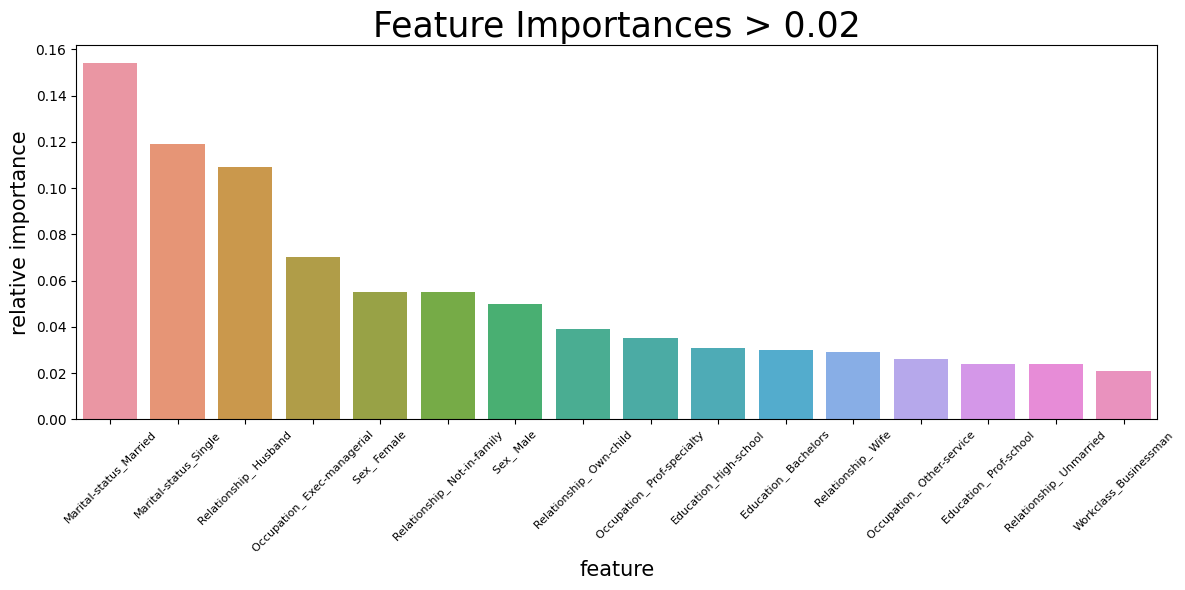

In [57]:
plt.figure(figsize=(12,6))

sns.barplot(importances[importances['importance'] > 0.02],x='feature',y='importance')

plt.title('Feature Importances > 0.02',fontsize=25)
plt.xlabel('feature',fontsize=15)
plt.xticks(fontsize=8,rotation=45)
plt.ylabel('relative importance',fontsize=15)
    
plt.tight_layout()
plt.show()


In [58]:
def get_test_scores(model_name:str,preds,y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy  = accuracy_score(y_test_data,preds)
    precision = precision_score(y_test_data,preds,average='macro')
    recall    = recall_score(y_test_data,preds,average='macro')
    f1        = f1_score(y_test_data,preds,average='macro')

    table = pd.DataFrame({'model': [model_name],'precision': [precision],'recall': [recall],
                          'F1': [f1],'accuracy': [accuracy]})

    return table 

# Gradient Booting Classifier

In [59]:
# Parameter grid
pars2 = {'learning_rate':[0.1,0.125,0.15],
         'n_estimators':[50,60,70],
         'max_depth':[5,6,7]}

gbrt_clf = GradientBoostingClassifier()
gbrt_grid = GridSearchCV(estimator=gbrt_clf,param_grid=pars2,cv=3)

gbrt_grid.fit(X_train,y_train)

test_preds_gbrt = gbrt_grid.predict(X_test)

gbrt_test_results = get_test_scores('GradientBoosting (test)',test_preds_gbrt,y_test)

print(gbrt_grid.best_params_)
print()
gbrt_test_results

{'learning_rate': 0.15, 'max_depth': 7, 'n_estimators': 70}



,model,precision,recall,F1,accuracy
0,GradientBoosting (test),0.777974,0.740842,0.755935,0.831706


# Confusion Matrix and ROC-AUC score

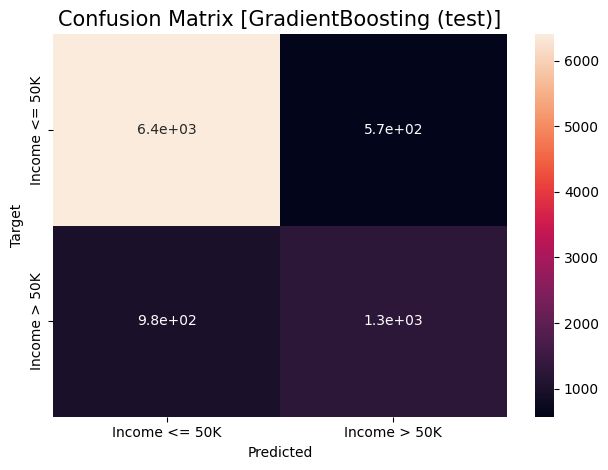

In [60]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test,test_preds_gbrt,labels=gbrt_grid.classes_)

ax = sns.heatmap(cm,annot=True)
ax.set_title('Confusion Matrix [GradientBoosting (test)]',fontsize=15)
ax.xaxis.set_ticklabels(['Income <= 50K','Income > 50K']) 
ax.yaxis.set_ticklabels(['Income <= 50K','Income > 50K']) 
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

plt.tight_layout()

In [61]:
prob_test = gbrt_grid.predict_proba(X_test)[:,1]

print("Test ROC-AUC:",roc_auc_score(y_test,prob_test))

Test ROC-AUC: 0.8799303081948369


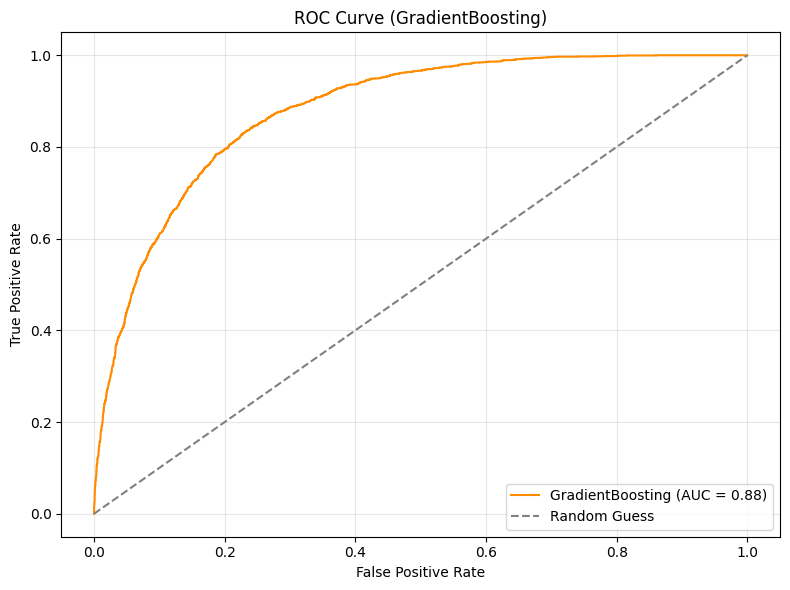

In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob, text, color='blue', linestyle='-', label=None):
    """
    Plots the ROC curve based on the probabilities.
    
    Parameters:
    - true_y: Ground truth labels
    - y_prob: Predicted probabilities
    - text: Additional text for the title
    - color: Color of the ROC curve (default: 'blue')
    - linestyle: Line style for the ROC curve (default: '-')
    - label: Legend label for the ROC curve (default: None)
    """
    # Compute FPR, TPR, and thresholds
    fpr, tpr, _ = roc_curve(true_y, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color=color, linestyle=linestyle, 
             label=f"{label} (AUC = {roc_auc:.2f})" if label else f"AUC = {roc_auc:.2f}")
    
    # Add diagonal line for reference
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
    
    # Aesthetics
    plt.title(f'ROC Curve {text}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example Usage
plot_roc_curve(
    y_test, 
    prob_test, 
    text='(GradientBoosting)', 
    color='darkorange', 
    linestyle='-', 
    label='GradientBoosting'
)


# Random forest Classifier

In [66]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth':[2,3,4],
             'min_samples_leaf':[2,3,4],
             #'min_samples_split':[2,3,4],
             'n_estimators':[200,300,400]}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf,cv_params,cv=3,refit='accuracy')

rf_cv.fit(X_train,y_train)

test_preds_rf = rf_cv.predict(X_test)

rf_test_results = get_test_scores('RandomForest (test)',test_preds_rf,y_test)

print(rf_cv.best_params_)
print()
rf_test_results

{'max_depth': 4, 'min_samples_leaf': 4, 'n_estimators': 200}



,model,precision,recall,F1,accuracy
0,RandomForest (test),0.864896,0.507281,0.44602,0.759983


# Confusion Matrix and ROC_AUC score

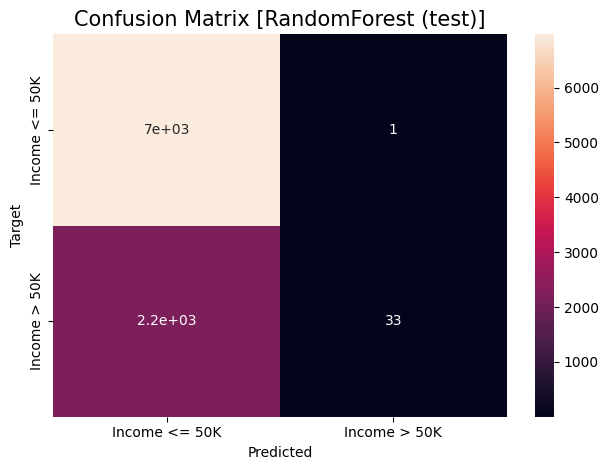

In [67]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test,test_preds_rf,labels=rf_cv.classes_)

ax = sns.heatmap(cm,annot=True)
ax.set_title('Confusion Matrix [RandomForest (test)]',fontsize=15)
ax.xaxis.set_ticklabels(['Income <= 50K','Income > 50K']) 
ax.yaxis.set_ticklabels(['Income <= 50K','Income > 50K']) 
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

plt.tight_layout()

In [68]:
prob_test = rf_cv.predict_proba(X_test)[:,1]

print("Test ROC-AUC:",roc_auc_score(y_test,prob_test))

Test ROC-AUC: 0.8608146297949629


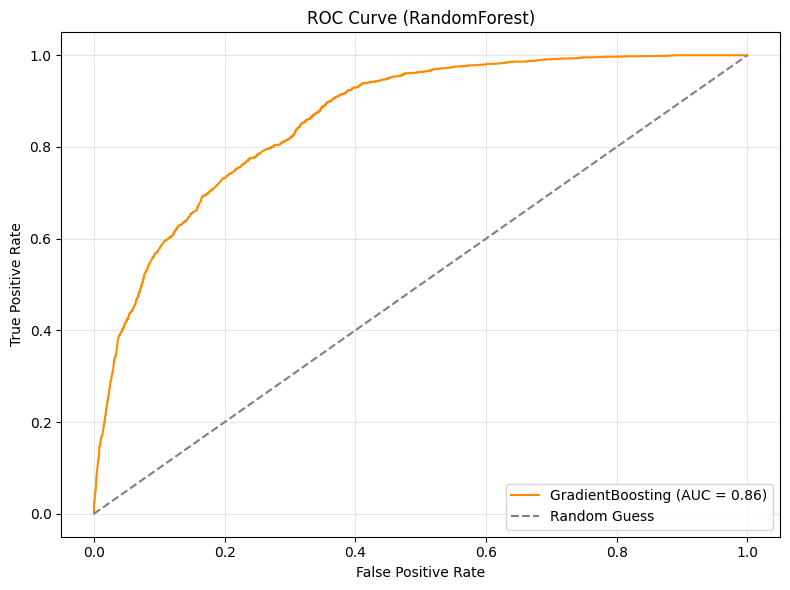

In [69]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob, text, color='blue', linestyle='-', label=None):
    """
    Plots the ROC curve based on the probabilities.
    
    Parameters:
    - true_y: Ground truth labels
    - y_prob: Predicted probabilities
    - text: Additional text for the title
    - color: Color of the ROC curve (default: 'blue')
    - linestyle: Line style for the ROC curve (default: '-')
    - label: Legend label for the ROC curve (default: None)
    """
    # Compute FPR, TPR, and thresholds
    fpr, tpr, _ = roc_curve(true_y, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color=color, linestyle=linestyle, 
             label=f"{label} (AUC = {roc_auc:.2f})" if label else f"AUC = {roc_auc:.2f}")
    
    # Add diagonal line for reference
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
    
    # Aesthetics
    plt.title(f'ROC Curve {text}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example Usage
plot_roc_curve(
    y_test, 
    prob_test, 
    text='(RandomForest)', 
    color='darkorange', 
    linestyle='-', 
    label='GradientBoosting'
)


# AdaBoost Classifier

In [70]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

cv_params = {'n_estimators':[50,120], 
             'learning_rate':[0.1,0.5,1.],
             'base_estimator__min_samples_split':np.arange(2,8,2),
             'base_estimator__max_depth' : np.arange(1,4,1)
            }

ada_cv = GridSearchCV(ada,cv_params,cv=3)

ada_cv.fit(X_train,y_train)

test_preds_ada = ada_cv.predict(X_test)

ada_test_results = get_test_scores('AdaBoost (test)',test_preds_ada,y_test)

print(ada_cv.best_params_)
print()
ada_test_results

{'base_estimator__max_depth': 1, 'base_estimator__min_samples_split': 2, 'learning_rate': 1.0, 'n_estimators': 120}



,model,precision,recall,F1,accuracy
0,AdaBoost (test),0.785603,0.741316,0.758732,0.835395


# Confusion Matrix and ROC and AUC score

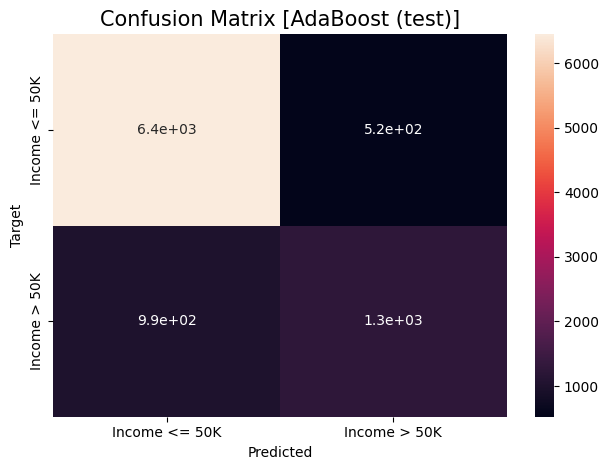

In [71]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test,test_preds_ada,labels=ada_cv.classes_)

ax = sns.heatmap(cm,annot=True)
ax.set_title('Confusion Matrix [AdaBoost (test)]',fontsize=15)
ax.xaxis.set_ticklabels(['Income <= 50K','Income > 50K']) 
ax.yaxis.set_ticklabels(['Income <= 50K','Income > 50K']) 
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

plt.tight_layout()

In [72]:
prob_test = ada_cv.predict_proba(X_test)[:,1]

print("Test ROC-AUC:",roc_auc_score(y_test,prob_test))

Test ROC-AUC: 0.8859777025085316


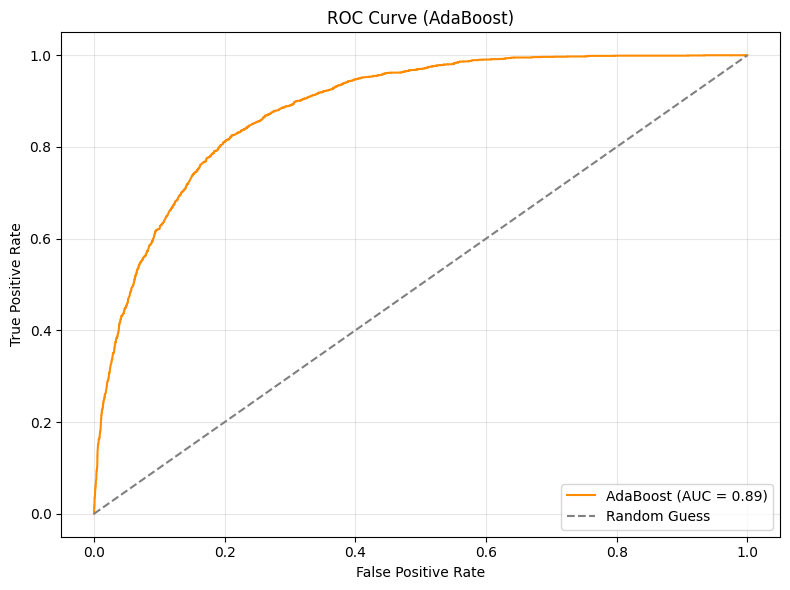

In [74]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob, text, color='blue', linestyle='-', label=None):
    """
    Plots the ROC curve based on the probabilities.
    
    Parameters:
    - true_y: Ground truth labels
    - y_prob: Predicted probabilities
    - text: Additional text for the title
    - color: Color of the ROC curve (default: 'blue')
    - linestyle: Line style for the ROC curve (default: '-')
    - label: Legend label for the ROC curve (default: None)
    """
    # Compute FPR, TPR, and thresholds
    fpr, tpr, _ = roc_curve(true_y, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color=color, linestyle=linestyle, 
             label=f"{label} (AUC = {roc_auc:.2f})" if label else f"AUC = {roc_auc:.2f}")
    
    # Add diagonal line for reference
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
    
    # Aesthetics
    plt.title(f'ROC Curve {text}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example Usage
plot_roc_curve(
    y_test, 
    prob_test, 
    text='(AdaBoost)', 
    color='darkorange', 
    linestyle='-', 
    label='AdaBoost'
)


# AdaBoost Classifier on Undersampled Data

In [75]:
# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=42,sampling_strategy='majority')

# Balancing the data
X_under,y_under = rus.fit_resample(X_train,y_train)

In [76]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

ada_cv = GridSearchCV(ada,cv_params,cv=3)

ada_cv.fit(X_under,y_under)

under_test_preds_ada = ada_cv.predict(X_test)

ada_under_test_results = get_test_scores('AdaBoost (test, undersampled)',under_test_preds_ada,y_test)

print(ada_cv.best_params_)
print()
ada_under_test_results

{'base_estimator__max_depth': 1, 'base_estimator__min_samples_split': 2, 'learning_rate': 0.5, 'n_estimators': 120}



,model,precision,recall,F1,accuracy
0,"AdaBoost (test, undersampled)",0.735368,0.802982,0.746803,0.781467


# Confusion Matrix and ROC_AUC score

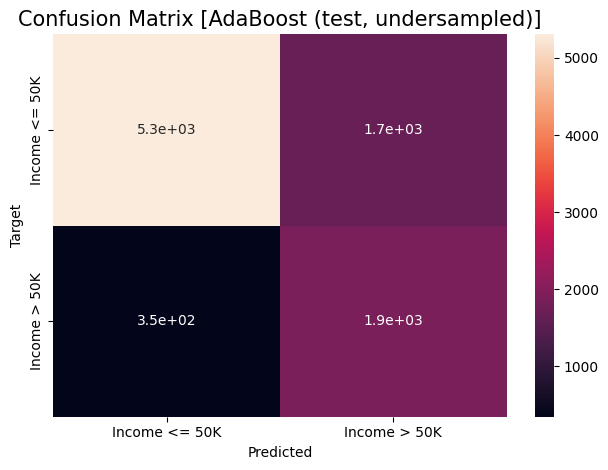

In [77]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test,under_test_preds_ada,labels=ada_cv.classes_)

ax = sns.heatmap(cm,annot=True)
ax.set_title('Confusion Matrix [AdaBoost (test, undersampled)]',fontsize=15)
ax.xaxis.set_ticklabels(['Income <= 50K','Income > 50K']) 
ax.yaxis.set_ticklabels(['Income <= 50K','Income > 50K']) 
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

plt.tight_layout()

In [78]:
prob_test = ada_cv.predict_proba(X_test)[:,1]

print("Test ROC-AUC:",roc_auc_score(y_test,prob_test))

Test ROC-AUC: 0.8848662411295296


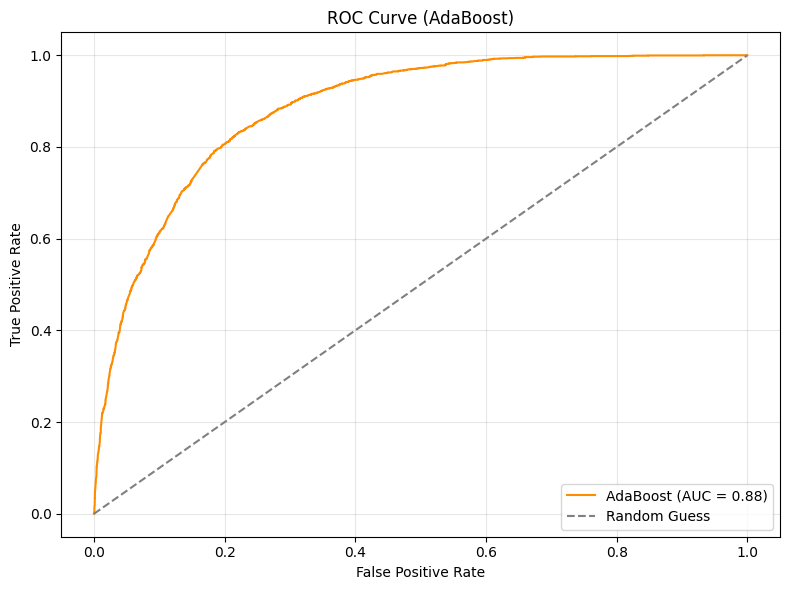

In [79]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob, text, color='blue', linestyle='-', label=None):
    """
    Plots the ROC curve based on the probabilities.
    
    Parameters:
    - true_y: Ground truth labels
    - y_prob: Predicted probabilities
    - text: Additional text for the title
    - color: Color of the ROC curve (default: 'blue')
    - linestyle: Line style for the ROC curve (default: '-')
    - label: Legend label for the ROC curve (default: None)
    """
    # Compute FPR, TPR, and thresholds
    fpr, tpr, _ = roc_curve(true_y, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color=color, linestyle=linestyle, 
             label=f"{label} (AUC = {roc_auc:.2f})" if label else f"AUC = {roc_auc:.2f}")
    
    # Add diagonal line for reference
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
    
    # Aesthetics
    plt.title(f'ROC Curve {text}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example Usage
plot_roc_curve(
    y_test, 
    prob_test, 
    text='(AdaBoost)', 
    color='darkorange', 
    linestyle='-', 
    label='AdaBoost'
)


# Comparision between the different results

In [80]:
final_results = pd.concat([gbrt_test_results,rf_test_results,ada_test_results,ada_under_test_results],axis=0)

final_results

,model,precision,recall,F1,accuracy
0,GradientBoosting (test),0.777974,0.740842,0.755935,0.831706
0,RandomForest (test),0.864896,0.507281,0.446020,0.759983
0,AdaBoost (test),0.785603,0.741316,0.758732,0.835395
0,"AdaBoost (test, undersampled)",0.735368,0.802982,0.746803,0.781467


<Figure size 1200x600 with 0 Axes>

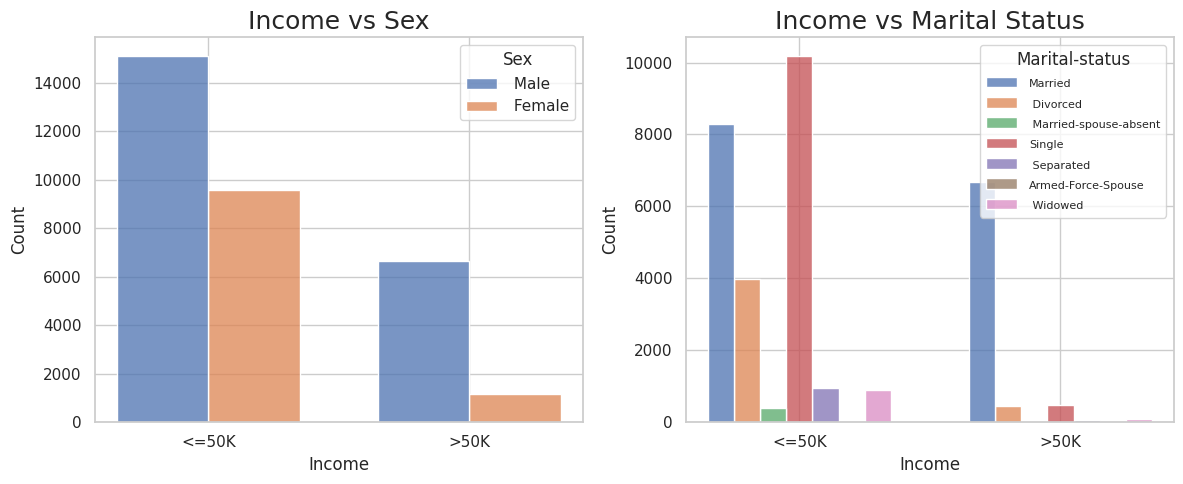

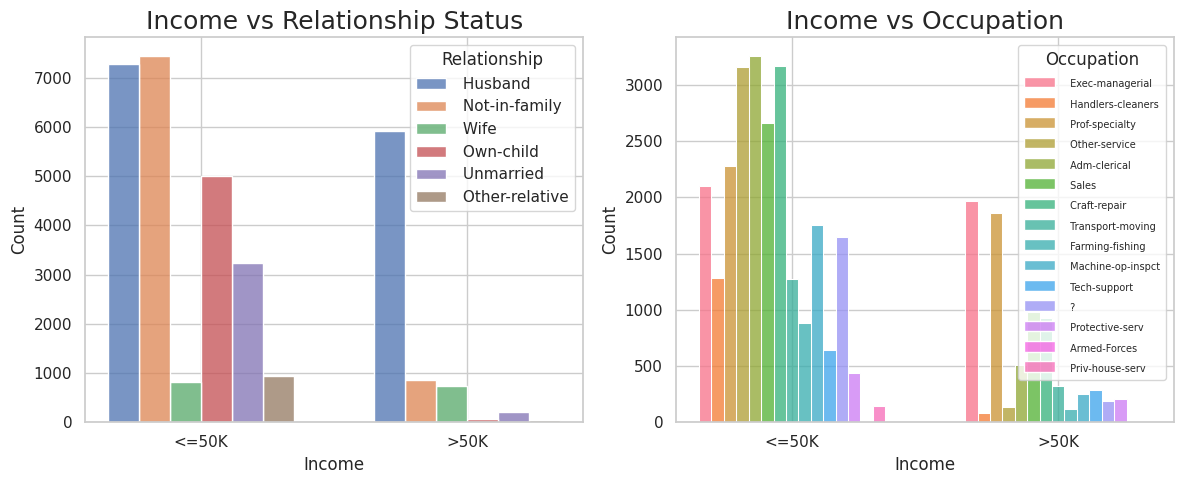

In [83]:
for col in columns:
    data = df[df[col] != ' ?']


bigfig = plt.figure(figsize=(12,6))

(top,bottom) = bigfig.subfigures(2,1)

### Top figures ###
top.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4)

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1 = sns.histplot(data=df,x='Income',hue='Sex',multiple='dodge',shrink=.7,ax=ax1)
ax1.set_title('Income vs Sex',size=18)

ax2 = sns.histplot(data=df,x='Income',hue='Marital-status',multiple='dodge',shrink=.7,ax=ax2)
ax2.set_title('Income vs Marital Status',size=18)
plt.setp(ax2.get_legend().get_texts(),fontsize='8') 

plt.tight_layout()

### Bottom figures ###
top.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4)

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1 = sns.histplot(data=df,x='Income',hue='Relationship',multiple='dodge',shrink=.7,ax=ax1)
ax1.set_title('Income vs Relationship Status',size=18)

ax2 = sns.histplot(data=df,x='Income',hue='Occupation',multiple='dodge',shrink=.7,ax=ax2)
ax2.set_title('Income vs Occupation',size=18)
plt.setp(ax2.get_legend().get_texts(),fontsize='7') 

plt.tight_layout()

# If you like this notebook please upvote